# Feature Extraction and Image Processing
Mark S. Nixon & Alberto S. Aguado http://www.southampton.ac.uk/~msn/book/
### Chapter 9: *WaterShedGradientTransform*
Compute Watershed transform by considering the gradient image 
***  

### Setup modules

In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname("__file__"), "../../Modules"))

# Module functions
from ImageUtilities import imageReadL, plotImageL, createImageF, plotImageF
from ImagePropertiesUtilities import imageMaxMin
from ConvolutionUtilities import createGaussianKernel, createSobelKernel, applyKernelMA, applyKernelF
from ImageRegionsUtilities import watherShed

# Iteration
from timeit import itertools

### Parameters:
    pathToDir = Input image directory
    imageName = Input image name
    suppWindow = Size of the window used to find maximum

In [2]:
pathToDir = os.path.join(os.path.dirname("__file__"), "../../Images/Chapter9/Input/")
imageName = "Logs.png"
suppWindow = 5  

### Show input image

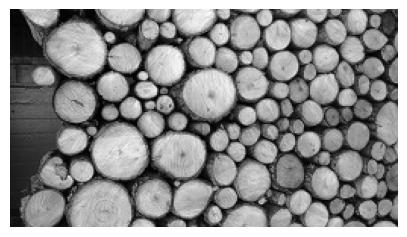

In [3]:
inputImage, width, height = imageReadL(pathToDir+imageName)
plotImageL(inputImage)

### Apply Sobel kernel. We use normalized magnitude in this example

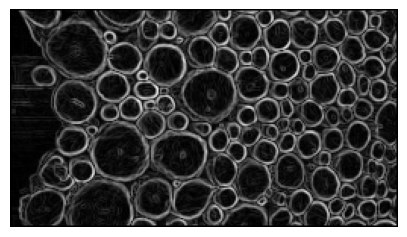

In [4]:
sobelX, sobelY = createSobelKernel(3)
normalizeMagnitude = False
magnitude, _, _, _ = applyKernelMA(inputImage, sobelX, sobelY, normalizeMagnitude)
plotImageF(magnitude)

### Apply Gaussian kernel

In [5]:
gaussianKernel = createGaussianKernel(10)
gaussianImage = applyKernelF(magnitude, gaussianKernel)

### Invert the image and add all pixels to the shape

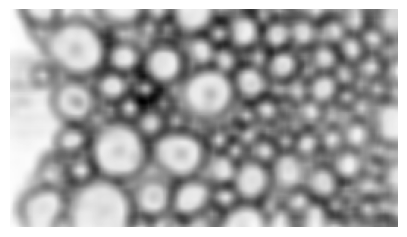

In [7]:
shapeImage = [ ]
distanceImage = createImageF(width, height)
maxGradient, minGradient = imageMaxMin(gaussianImage)
for x,y in itertools.product(range(0, width), range(0, height)):
    distanceImage[y,x] = maxGradient - gaussianImage[y,x]
    shapeImage.append((y,x))
plotImageF(distanceImage)

### Watershed of the distance image

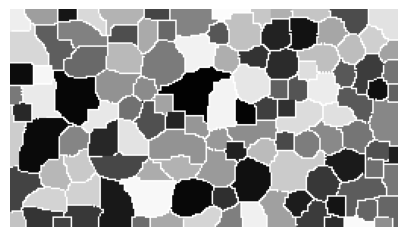

In [8]:
watershed = watherShed(distanceImage, shapeImage, suppWindow)
plotImageF(watershed)
